# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23, 191, 358]
# supermarket # restaurants # dinner
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,13624,295,1381,890,43,84
2,759,18664,1660,6114,536,4100


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

- *Sample 0* purchases large amounts of all six categories of items: its purchases of six categories are all higher above the 75 percentaile. This sample represents large scale **retailers**.
- *Sample 1* purchases large amounts of **Fresh** (between 50 percentile to 75 percentile), fair amounts of **Grocery** and **Frozen** (between 25 percentile and 50 percentile), small amounts of **Milk**, **Detergents_Paper** and **Delicatessen**. This sample could represent **restaurants**.
- *Sample 2* purchases a lot of **Milk**, **Frozen** and **Delicatessen** (above 75% percentile), and some amount of **Grocery**, **Fresh** and **Detergents_Paper**. This sample represents **supermarkets/grocery stores**.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

/Users/Zhongyu/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


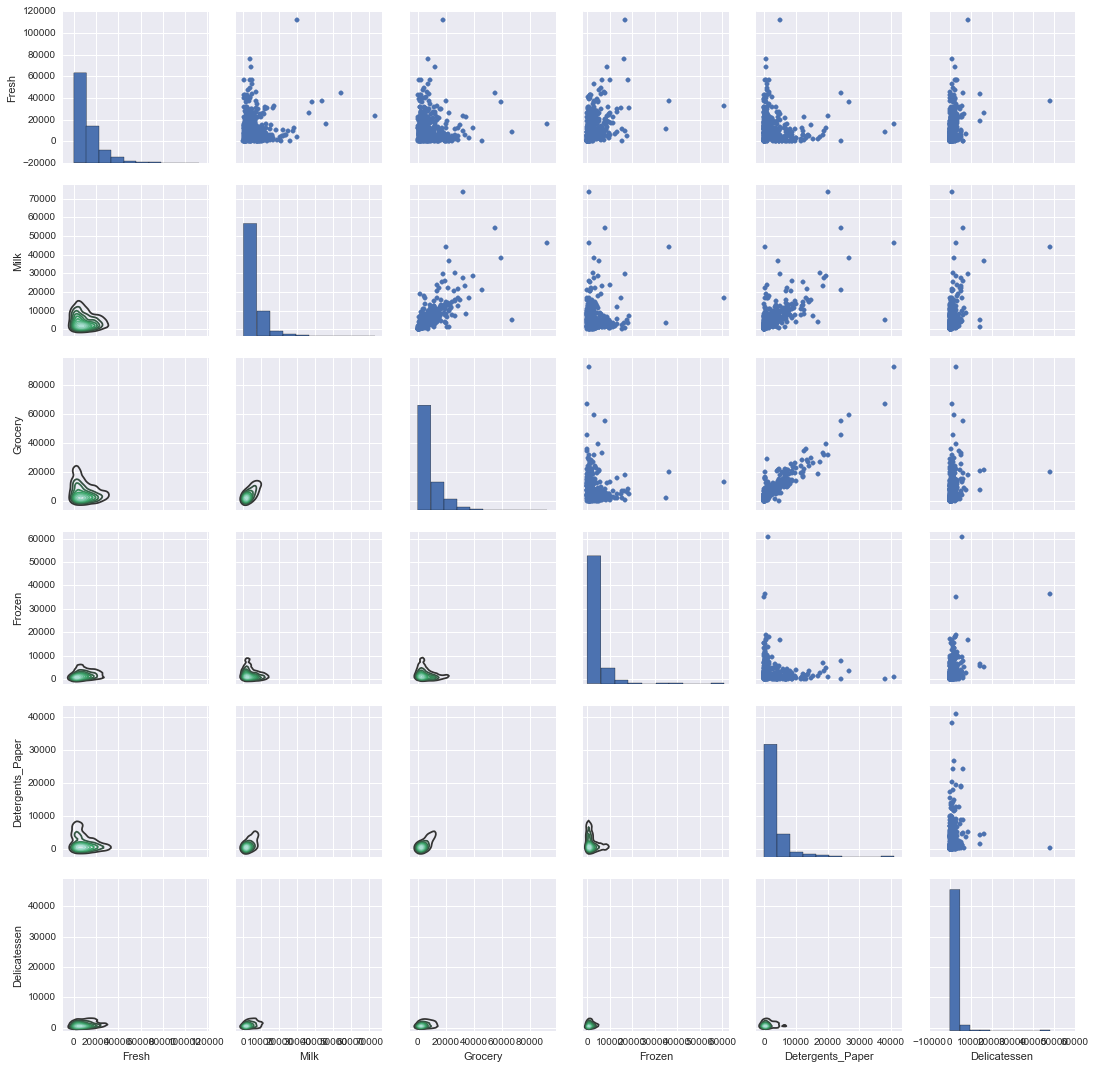

In [4]:
# Visually explore correlation relationships between features
import matplotlib.pyplot as plt
import seaborn as sns
p = sns.PairGrid(data)
p.map_diag(plt.hist)
p.map_upper(plt.scatter)
p.map_lower(sns.kdeplot)
plt.show()

Pairwise scatter plots show that 
    - **Grocery** and **Milk** are somewhat linearly correlated (with heteroskedasticity presence)
    - **Grocery** and **Detergents_Paper** are strongly linearly correlated
Therefore, examine how relevant are **Grocery** and other features...

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target

X_train, X_test, y_train, y_test = train_test_split(new_data,data['Grocery'], test_size=.25, random_state=102)#9 

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=952)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "R^2 score of Decision Tree Regression: {:.3f}".format(score)

R^2 score of Decision Tree Regression: 0.837


In [6]:
# Least Square Linear Regression Approach
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
print linear_regressor.score(X_test, y_test)

0.910048156121


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

The feature **Grocery** was predicted using Decision Tree Regressor using all the rest 5 features. The fitted model produces a R^2 score of 0.837. R^2, the coefficient of determination, is a score for providing information in terms of how well the model fits the data. The obtained R^2 implies that 83.7% of the variances of the true response variable, **Grocery** in test set, are explained by the fitted model. This is a pretty high score, implies that **Grocery** is very relevant/strongly correlated with respect to other features. Given such a high R^2 score, out of the consideration of parsimony (Occam's Razor), **Grocery** is *removed* from the dataset.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

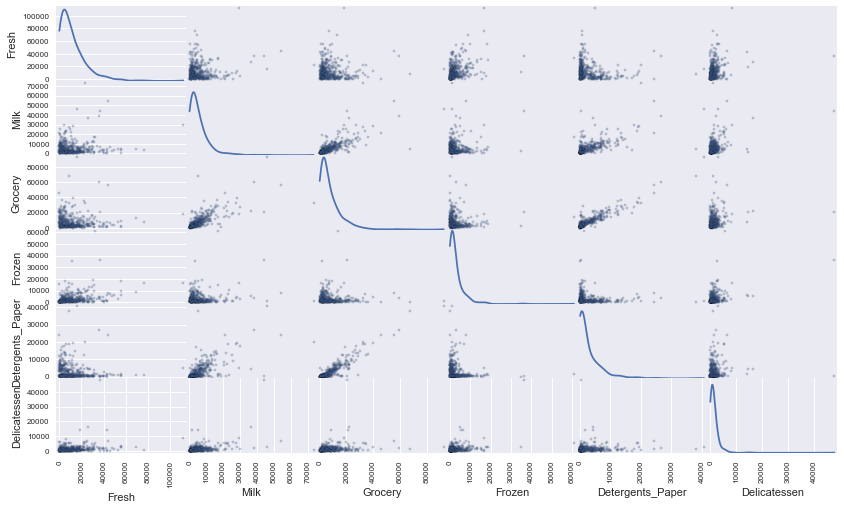

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
- **Grocery** and **Detergents_Paper** are strongly linearly correlated
- **Grocery** and **Milk** are somewhat linearly correlated
- **Milk** and **Detergents_Paper** are somewhat linearly correlated (makes sense given the previous two correlated pairs)

This confirms and is consistant with the high R^2 score produced in the previous section, which built a Decision Tree Regression model to predict values of **Grocery** using the other 5 features.

None of the six features are normally distributed. The distributions for all six features peak at a relatively small value ranges, but come with long tails at large value ranges, hence all six distributions are right skewed. The scatter plots confirm the distribution characteristics: most of the points are clustered around the lower left corner; whereas some outliers scatter around the high value axies range.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

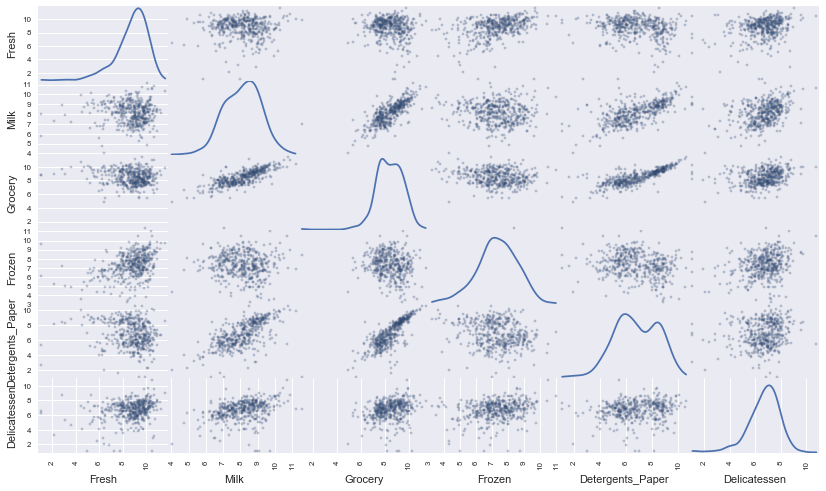

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = data.applymap(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.applymap(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

**Scale features using BoxCox** - compare to natural logarithm

*Note*: BoxCox transform results a more normal-like shape for feature **Fresh**, **Grocery**, **Delicatessen**. However the bimodal feature in feature **Detergents_Paper** remains the same as natural logarithm transformation.

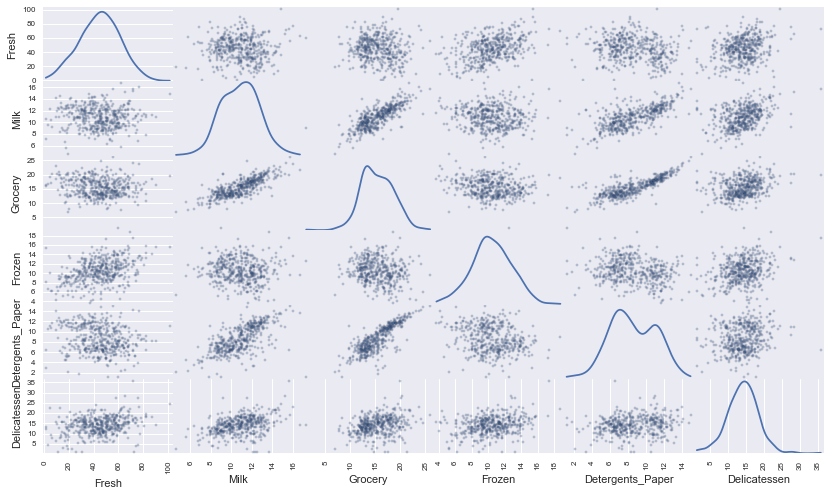

In [9]:
# TODO: Scale the data using the BoxCox
from scipy.stats import boxcox
bcx_data = data.apply(lambda x: boxcox(x)[0], axis=0)

# TODO: Scale the sample data using the BoxCox
bcx_samples = pd.DataFrame(bcx_data.loc[indices], columns = data.keys()).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(bcx_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,9.519588,5.686975,7.230563,6.791221,3.761200,4.430817
2,6.632002,9.834352,7.414573,8.718337,6.284134,8.318742


The distribution of each feature has become more bell-curve alike, hence more like to normal distribution. The correlations between some features are still present, but seems weaker than before.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
from collections import OrderedDict
potential_outlier_indices = {}
feature_cut_ranges = OrderedDict()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    potential_outlier_indices[feature] = set(log_data[~((log_data[feature] >= Q1 - step) & \
                                             (log_data[feature] <= Q3 + step))].index)
    feature_cut_ranges[feature] = [Q1 - step, Q3 + step]
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [12]:
# Overall investigate identified potential outlier indices
all_outlier_indices = potential_outlier_indices.values()
all_union = set.union(*all_outlier_indices)
print "There are ", len(all_union), "samples which have at least one feature value identified as outlier"
flat_indices = [i for lst in all_outlier_indices for i in lst]
print "Number of outlier indices, including duplicates: ", len(flat_indices)

There are  42 samples which have at least one feature value identified as outlier
Number of outlier indices, including duplicates:  48


In [13]:
from collections import Counter
duplicates = [k for k,v in Counter(flat_indices).items() if v>1]
print "Indices of samples with more than one feature identified as outlier:",  duplicates

Indices of samples with more than one feature identified as outlier: [128, 154, 65, 66, 75]


In [15]:
# Inefficient way to extract the feature info corresponding to each outlier index
outlier_features = {}
for i in duplicates:
    outlier_features[i] = []
    for feature, lst in potential_outlier_indices.items():
        if i in lst:
            outlier_features[i].append(feature)

print "outlier index\toutlier features"
for oi, of in outlier_features.items():
    print oi, '\t\t', of

outlier index	outlier features
128 		['Delicatessen', 'Fresh']
65 		['Frozen', 'Fresh']
154 		['Grocery', 'Delicatessen', 'Milk']
75 		['Grocery', 'Detergents_Paper']
66 		['Delicatessen', 'Fresh']


In [16]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [17]:
log_data.loc[duplicates]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


In [18]:
def closest_dist(val, cut_range):
    dist_low = val - cut_range[0]
    dist_high = cut_range[1] - val
    return min(dist_low, dist_high)

outlier_dists = {}
features = log_data.columns
for oi, of in outlier_features.items():
    non_outlier_features = [f for f in features if f not in of]
    dists = {}
    for nof in non_outlier_features:
        val = log_data.loc[oi][nof]
        cut_range = feature_cut_ranges[nof]
        dist = closest_dist(val, cut_range)
        dists[nof] = dist
    outlier_dists[oi] = dists

In [224]:
for oi, d in outlier_dists.items():
    print '-'*10,'index ',oi,'-'*10
    for k, v in d.items():
        print k, v

---------- index  128 ----------
Frozen 0.695476809438
Grocery 2.97303074612
Detergents_Paper 5.39579015789
Milk 2.11089466392
---------- index  65 ----------
Delicatessen 2.48848648288
Grocery 0.940059354021
Detergents_Paper 2.26831127558
Milk 1.24840493403
---------- index  154 ----------
Frozen 0.0571378653734
Fresh 0.918389259131
Detergents_Paper 0.487167485202
---------- index  75 ----------
Frozen 2.13427411935
Fresh 2.34737968075
Delicatessen 2.86657160997
Milk 2.01941552653
---------- index  66 ----------
Frozen 0.904435725761
Grocery 2.7611799493
Detergents_Paper 4.21236602179
Milk 2.3189010147


In [19]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are 5 data points (indices: 128, 154, 65, 66, 75) in total considered outliers for more than one feature based on the definition used above. Among them, data point with index 154 are considered outliers 3 times (**'Grocery', 'Delicatessen', 'Milk'**). The rest 4 data points are considered outliers 2 times each (details regarding to which features are considered outliers can be found by printing out variable **`outlier_features`**).

Data point with index of 154 is added to the `outliers` list and will be removed. The reasons for removing this data point are states as following:
    - It is considered outliers for 3 features
    - For the remaining features, which data point index 154 are not considered outliers, its values for these three features are all at borderline of falling outside of the non-outlier-range. (details see the following code)

In [20]:
for k, v in outlier_dists[154].items():
    if len(k) > len('Frozen'):
        print k, '\t', v
    else:
        print k, '\t\t\t', v

Frozen 			0.0571378653734
Fresh 			0.918389259131
Detergents_Paper 	0.487167485202


The reason for not adding the rest 4 data points into the `outlier` list is that: after examining their values of non-identified outlier features, it is shown that most of their values of non-identified outlier features are nowhere close to fall outside of the non-outlier-range. (details can be shown by printing out variable **`outlier_dists`**)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

explained variances: [ 0.44187869  0.27234886  0.11800166  0.09783371  0.04656394  0.02337314]


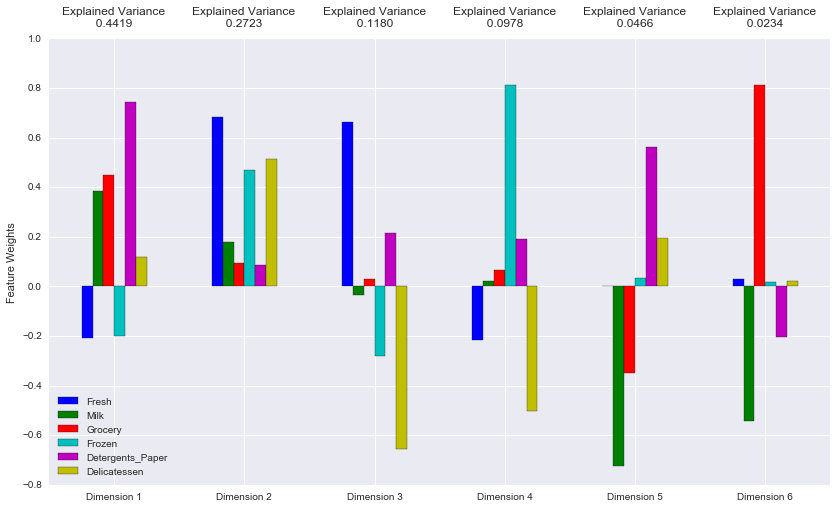

In [21]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

print "explained variances:", pca.explained_variance_ratio_

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [22]:
print "variances explained by first 2 components: %.4f" %sum(pca.explained_variance_ratio_[:2])
print "variances explained by first 4 components: %.4f" %sum(pca.explained_variance_ratio_[:4])

variances explained by first 2 components: 0.7142
variances explained by first 4 components: 0.9301


**Answer:**
- Variances explained in total by the first 2 component2: 0.7142
- Variances explained in total by the first 4 components: 0.9301

- **Dimension 1** represents customer spending with a strong tendency in purchasing **Detergents_Paper**, **Grocery**, **Milk**, a weak purchasing tendency of **Delicatessen**;  and a reluctant/unwilling tendency in purchasing **Fresh** and **Frozen**.
- **Dimension 2** represents customer spending with a dominanting purchasing tendency in **Fresh**, **Delicatessen** and **Frozen**, a relatively weak purchasing tendency in **Milk**, **Grocery** and **Detergents_Paper**
- **Dimension 3** represents customer spending has a dominanting purchasing tendency in **Fresh**, a pretty strong tendency to purchase **Detergents_Paper**, a very weak tendency to buy **Grocery**; and it's very unwillingly to purchase **Delicatessen**, with a moderate reluctant tendency in purchasing **Frozen**, and a weak reluctant tendency in purchasing **Milk**
- **Dimension 4** represents customer spending is very willingly to shop **Frozen**, somewhat incline to purchase **Detergents_Paper**, with a mild tendency to purchase **Grocery** and **Milk**; and it very strongly decline to purchase **Delicatessen**, a moderate reluctant tendency in purchasing **Fresh**

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [23]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.5984,3.8344,-1.0821,-0.3828,-0.7410,-0.2171
1,-4.0702,-1.6699,1.5387,-0.1726,0.0350,0.9157
2,0.1541,0.2340,-3.0741,0.6453,-0.7961,-1.6650


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.5984,3.8344
1,-4.0702,-1.6699
2,0.1541,0.2340


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
**K-Means Advantages**:
- Intuitively easy to understand
- It's a hard clustering algorithm, which means every sample can only be grouped into one specific cluster (need break tie mechanism)
- It is gaurantteed to converge (to a local optimal)

**K-Means Disadvantages**:
- The algorithm can get stuck, therefore in practice people usually randomly run the model more than one time to get a stable good result. (multiple runs to find global optimal)
- Computationally expensive (one iteration in big O(KN))

**Gaussian Mixture Model Advantages**:
- Since GMM is designed upon probability, the algoithm itself is monotonically non-descreasing likelihood, and it will not diverge. The underlying idea of GMM is using expectation maximization to cluster samples, and this idea can be expanded to use any distributions (not just Gaussian distribution) as long as the expectation of probability and the maximization problem are solvable.
- Computationally GMM is fast and efficient.
- It is a soft clustering technique, so it can find samples which belongs to more than one cluster.
- As a probablistic model, it makes sense and easy to interpret in a probability sense.

**Gaussian Mixture Model Disadvantages**:
- The algorithm can get stuck, it can usually be dealth with by randomly restarting the model.
- It is not gaurantteed to converge (although in practical often it does converge)

**Reasons for choosing GMM**
- it is computationaly cheap and fast; 
- its soft clustering feature may give some insights to interpret the cluster outcome of certain samples (nowadays, supermarkets and retailers have grown more and more alike: a lot of retail stores sell fresh and frozen food products; and a lot of supermarkets also provide products such as detergents papers to customers); 
- the expectation maximization idea behind GMM makes practical sense and easy to interpret in this specific application 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [26]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

num_clusters = range(2,16)
silhouettes_gmm = []
gmm_converge = []
for n in num_clusters:
    cluster = GMM(n_components=n)
    cluster.fit(reduced_data)
    predicts = cluster.predict(reduced_data)
    silhouettes_gmm.append(silhouette_score(reduced_data, predicts))
    gmm_converge.append(cluster.converged_)
# check if fitted gmm converged or not when fitting X
print gmm_converge

[True, True, True, True, True, True, True, True, True, True, True, True, True, True]


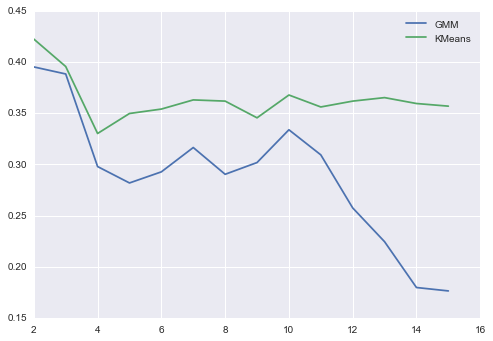

In [292]:
from sklearn.cluster import KMeans
silhouettes_kms = []
for n in num_clusters:
    cluster = KMeans(n_clusters=n)
    cluster.fit(reduced_data)
    predicts = cluster.predict(reduced_data)
    silhouettes_kms.append(silhouette_score(reduced_data, predicts))

plt.plot(num_clusters, silhouettes_gmm)
plt.plot(num_clusters, silhouettes_kms)
plt.legend(['GMM', 'KMeans']);plt.show()

In [28]:
optimal_n = num_clusters[silhouettes_gmm.index(max(silhouettes_gmm))]
print "number of clusters with the highest silhouette scores:", optimal_n

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components = optimal_n)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
#centers = clusterer.cluster_centers_  for KMeans

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print "The mean silhouette score: %.4f"%score

number of clusters with the highest silhouette scores: 2
The mean silhouette score: 0.3952


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

cluster number		silhouettes score
2 			0.395226566135
3 			0.390995735424
4 			0.299198788362
5 			0.281811722952
6 			0.2851182753
7 			0.313100370597
8 			0.309846266181
9 			0.334587009347
10 			0.326040142624
11 			0.302879769048
12 			0.226301167299
13 			0.23193252794
14 			0.152277380221
15 			0.219892153348


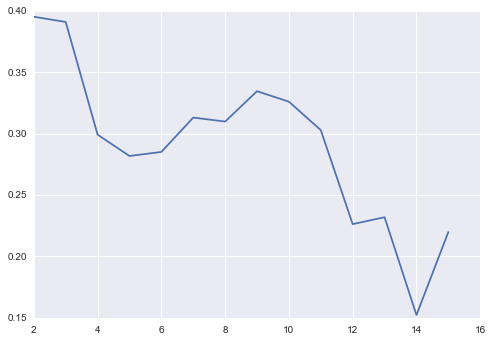

In [29]:
print "cluster number\t\tsilhouettes score"
for n, s in zip(num_clusters, silhouettes_gmm):
    print n, '\t\t\t', s
plt.plot(num_clusters, silhouettes_gmm);plt.show()

**Answer:**

The tried different numbers of clusters and their corresponding silhouette scores are printed out and plotted as above. It is evident that when picking 2 clusters, the fitted model produces the best/highest silhouette score with a value of 0.3952.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

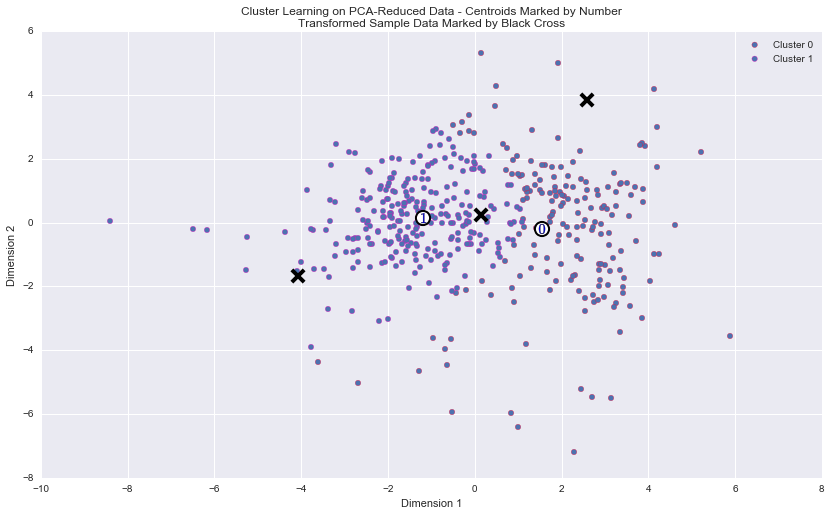

In [30]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [31]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3920,5954,9243,989,2806,861
Segment 1,8846,2214,2777,2042,375,744


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

**Segment 0** is likely representing establishments of **supermarkets/restaurants**, and **Segment 1** is more likely represnting **retailers**. Compare the feature values of the two segments, in conjunction with the summary of the whole dataset (`data.describe()`), the major differences between the two segments are that **Segment 0** has high values in feature categories of **Fresh** (about 50 percentile), **Frozen** (between 50 and 75 percentile); and **Segment 1** has high values in **Grocery** and **Detergents_Paper** (both features are close to 75 percentile). As we all know that nowadays both supermarkets and retailers sell various kinds of foods (including fresh food, milk, frozen food, deli), grocery and detergents and paper towls. However supermarkets tend to focus on supplying fresh food, whereas retailers sell larger amounts of detergents/paper than fresh food. Therefore it's likly that **Segment 0** represents establishments of **supermarkets** and **Segment 1** represents establishments of **retailers**.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [32]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,13624,295,1381,890,43,84
2,759,18664,1660,6114,536,4100


In [33]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

- **Sample point 0** has high purchase values in **Grocery** and **Detergents_Paper**, which is consistent with the feature characteristics of **Segment 1**. And **Sample point 0** is persistently predicted as in **Cluster 1**.
- **Sample point 1** purchases a lot of **Fresh**, good amounts of **Frozen**, however small amount of **Detergents_Paper**. This matches with **Segment 0**. The prediction for **Sample point 1** is indeed **Cluster 0**.
- **Sample point 2** consumes large amounts of **Frozen**, **Milk** and **Delicatessen**, and moderate amount of **Grocery** and **Detergents_Paper**. By first glance, it is less obvious to tell that which Segment **Sample point 2** resembles more. However given that the value of **Frozen** category of **Sample point 2** is above the 75% percentile of **Frozen** for all data points; and its value of **Detergents_Paper** is below 50 percentile, and way smaller than the **Detergents_Paper** of **Segment 1**. It is more likely that **Sample point 2** is best represented by **Segment 0**, which is consistent with the prediction result given by the fitted model.

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The clustering analysis shows that there are hidden patterns in the data, which divides customers into two segments. When designing the A/B test, this factor needs to be taken into account, and considers what if customers from the two different segments respond to the A and B variants differently.

To accommodate this existing segmentation pattern in the customers, in the experiment design phase, the **sampling strategy** needs to make sure that: 1) customers from both segments are well represented; 2) customer samples from both segments are randomly assigned to both A and B variants.

When choosing A/B test evaluation **metrics**, it is needed to make sure that the metrics is not biased to any particular segments.

When **analyzing** the A/B test data, customers' responses to A and B variants need to be analyzed inside each group/segments, which provides insight about how customers from a specific segments react to the two variants. Meanwhile, statistical analysis can be performed inter-group/segment as well to determine which segment/group of customers is more preceptive to the variants; and/or which group/segment is more affected by the variants. Based on the specific situation, techniques like [**ANOVA**](https://en.wikipedia.org/wiki/Analysis_of_variance) are applicable to achieve the goal of analying differences among groups.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

Besides the six product category features, the engineered *customer segment* using cluster analysis can serve as an additional feature. Then train a supervised classification learner using all seven features, and using the known delivery services as the outcome/target.

Then for the ten new customers, use the fitted cluster model to predict which segments they best fit in. After acquiring the *customer segment* information of them, use the trained supervised learner to predict the most appropriate delivery service for them.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

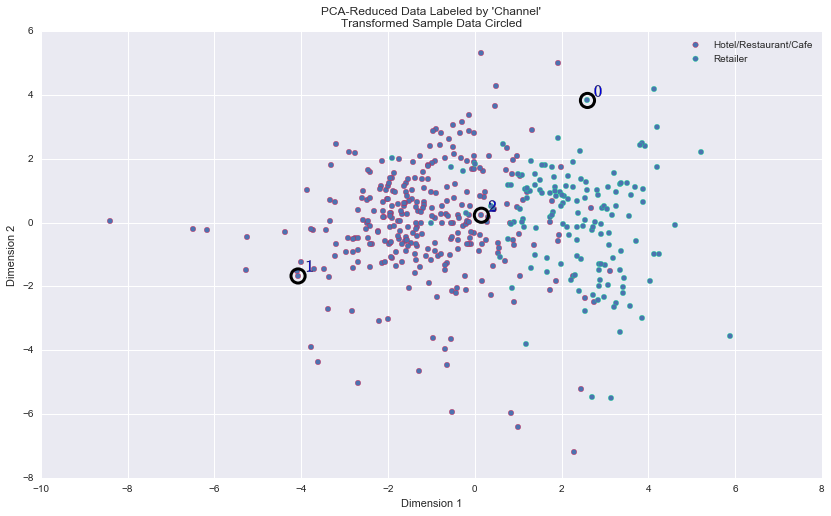

In [34]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

- The number of clusters (2) choosen is the same with the number of different labels (either *HoReCa* or *Retail*) in the **Channel** attribute.
- Compare the plot above with respect to the distribution of coustomer segments/clusters (see next section), it is shown that the distribution of Cluster 0/Segment 0 is mostly **consistent** with *HoReCa* label, and Cluster 1/Segment 1 is mostly consistent with *Retail* label. Although there are small portion of customers which are predicted to be in Cluster 0 whereas its **Channel** label is *Retail*, or predicted to be in Cluster 1 whereas its **Channel** label is *HoReCa*. Given the idea of GMM, which is predicting the cluster label by computing the maximum likilihood of a sample belonging to a cluster under the assumption of a distribution (Gaussian distribution in this case), it is not counterintuitive that there are some samples' predicted cluster labels not exactly matching **Channel** labels, since *maximum likelihood* simply states that it is the most likely cluster label, it is still possible (with a very small possibility) that the sample belongs to a different cluster (possibility of a sample's outcome under Gaussian distribution never actually equals to zero, it just approaches zero). 
- In summary, the customer segments achieved from the previous clustering analysis is **consistent** with respect to the **Channel** feature, with some protion of samples miscalssified.

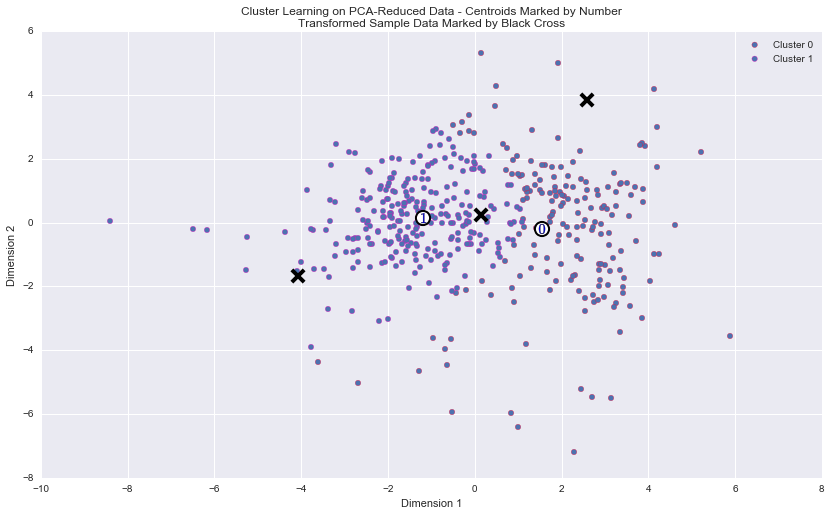

In [35]:
rs.cluster_results(reduced_data, preds, centers, pca_samples)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.